### Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import pandas as pd

### Loading Datasets

In [5]:
df=pd.read_csv('matches.csv')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
shape=df.shape
print(f'There are total {shape[0]} rows and {shape[1]} columns in Dataset')

There are total 756 rows and 18 columns in Dataset


### INFO of Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Missing Values

In [13]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

##### There are 637 missing values of Umpire 3, but we don't need to work on filling this as it is not relavant to our analysis
##### Winners and Player of Match both columns have 4 missing values, that may because match was not played due to some reasons


## VISUALIZATION

### No. of matches played in each IPL season

Text(0.5, 1.0, 'Matches played in each IPL season')

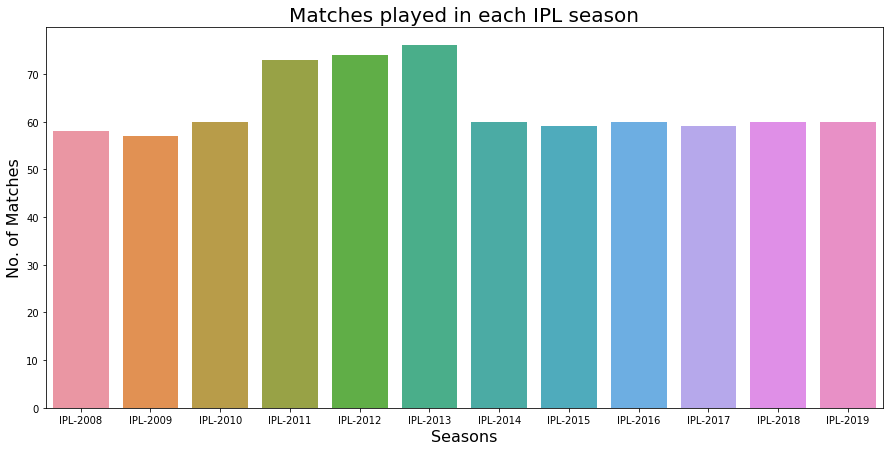

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(df['Season'],order=df['Season'].value_counts().index.sort_values())
plt.xlabel('Seasons',fontsize=16)
plt.ylabel('No. of Matches',fontsize=16)
plt.title('Matches played in each IPL season',fontsize=20)

##### In 2013 maximum number of Matches were played

### Matches Won by the team

Text(0.5, 1.0, 'MATCHES WON BY THE TEAM')

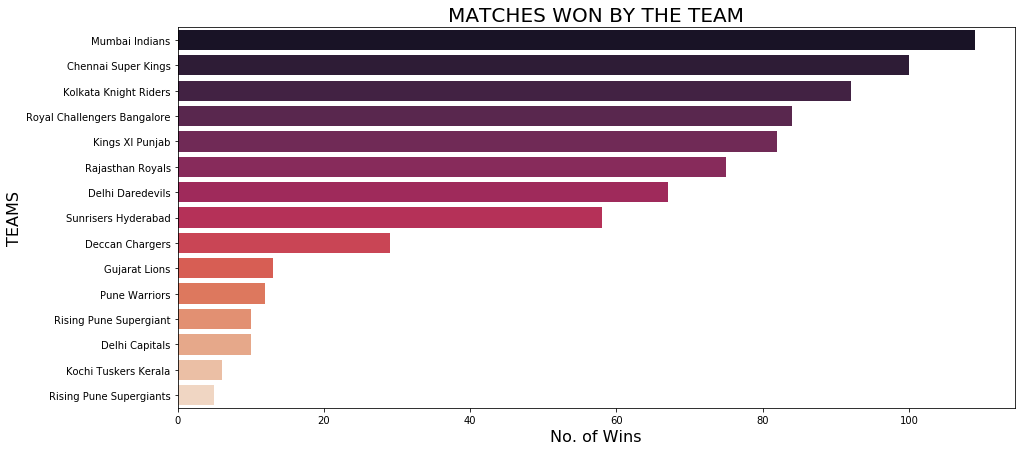

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(y=df['winner'],order=df['winner'].value_counts().index,palette='rocket')
plt.xlabel('No. of Wins',fontsize=16)
plt.ylabel('TEAMS',fontsize=16)
plt.title('MATCHES WON BY THE TEAM',fontsize=20)

##### Mumbai Indian leads the table by winning maximum number of matches

### No of Matches Played in Stadium

Text(0.5, 1.0, 'MATCHES PLAYED IN DIFFERENT STADIUMS')

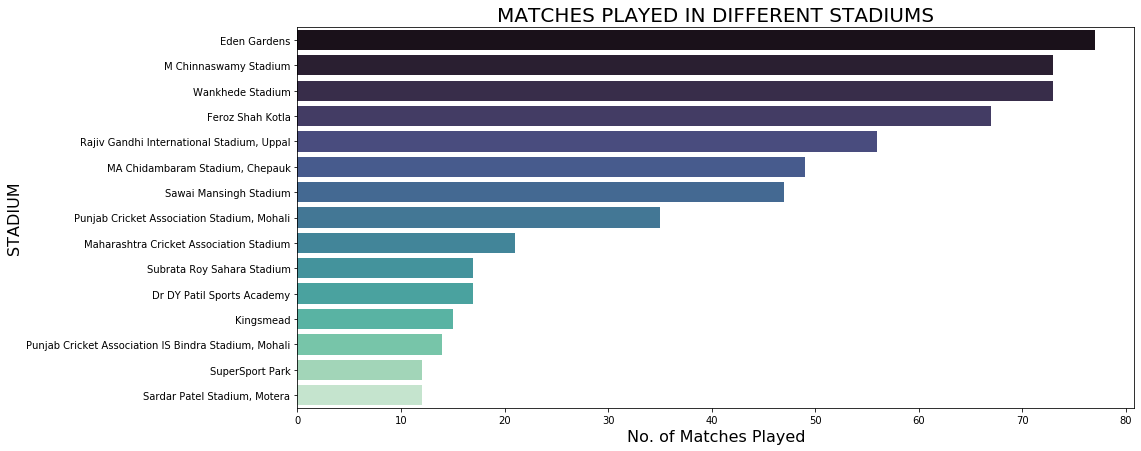

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(y=df['venue'],order=df['venue'].value_counts()[:15].index,palette='mako')
plt.xlabel('No. of Matches Played',fontsize=16)
plt.ylabel('STADIUM',fontsize=16)
plt.title('MATCHES PLAYED IN DIFFERENT STADIUMS',fontsize=20)

##### Maximum number of matches were played in Eden Garden stadium of Kolkata 

### TOSS DECISION

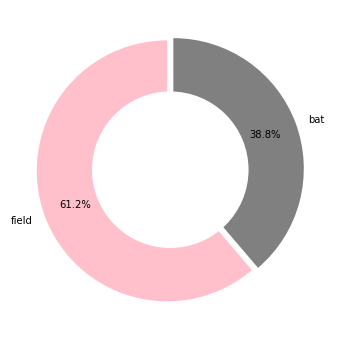

In [85]:
plt.figure(figsize=(6,6))
plt.pie(x=df['toss_decision'].value_counts(),labels=df['toss_decision'].value_counts().index,colors=['pink','grey'],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.75,explode=(0.025,0.025))
circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(circle)

Text(0.5, 1.0, 'Analysis of Toss Decision in each season')

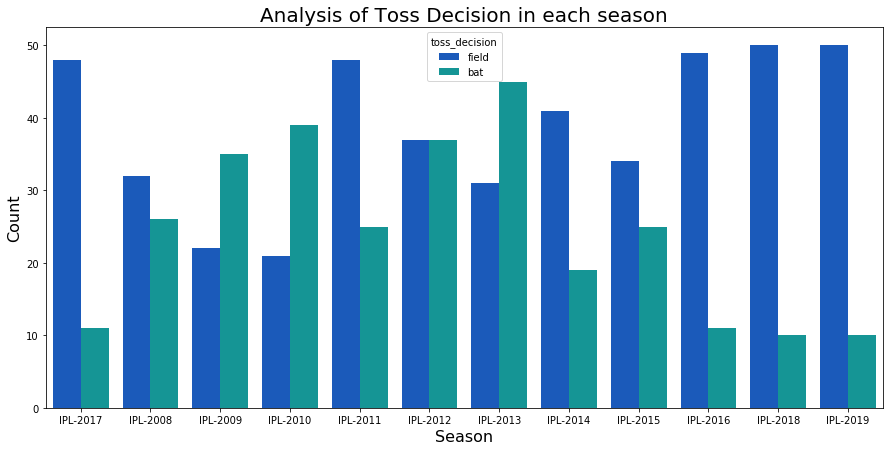

In [101]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Season'],hue=df['toss_decision'],palette='winter')
plt.xlabel('Season',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Analysis of Toss Decision in each season',fontsize=20)

##### From graph we can conclude that after 2013 season fielding trend got started after winning the toss

### Player Of The Match

Text(0.5, 1.0, 'TOP 10 player with maximum MOM award')

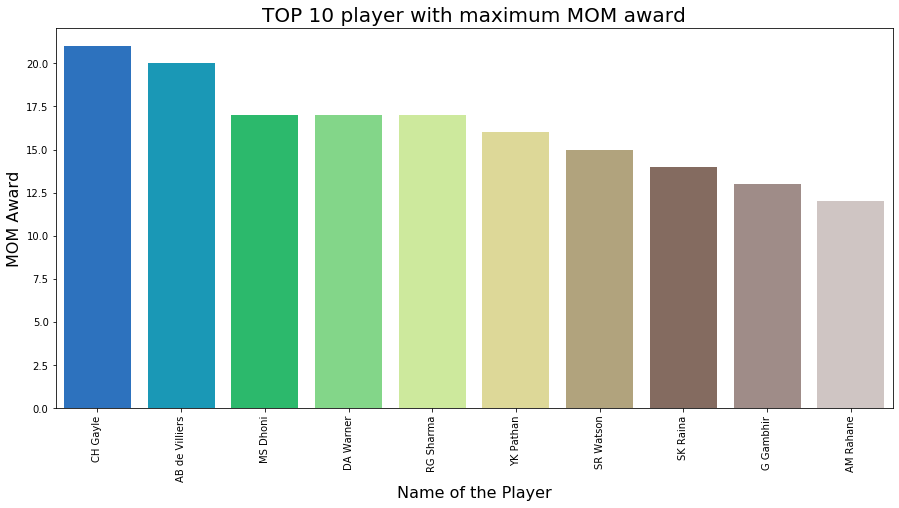

In [125]:
plt.figure(figsize=(15,7))
df['player_of_match'].value_counts()
sns.barplot(x=df['player_of_match'].value_counts().index[:10],y=df['player_of_match'].value_counts()[:10],palette='terrain')
plt.xticks(rotation=90)
plt.xlabel('Name of the Player',fontsize=16)
plt.ylabel('MOM Award',fontsize=16)
plt.title('TOP 10 player with maximum MOM award',fontsize=20)

##### Chris Gayle won maximum number of Man of The Match awards